<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/TensorFlow_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction & Data Setup

**Regression** is a supervised machine learning technique which is used to predict continuous values. The ultimate goal of the regression algorithm is to plot a best-fit line or a curve between the input features (independant variables) and the output label (dependant variable).

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

For starters, we'll solve a very basic regression problem

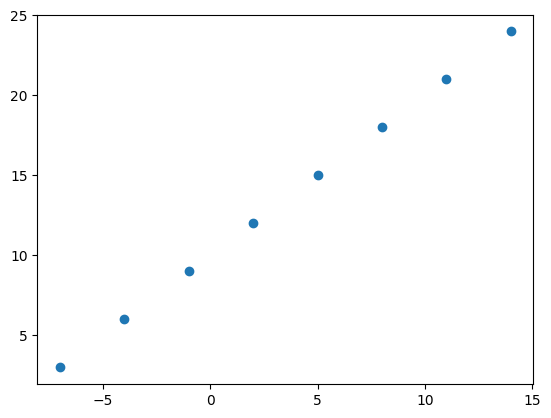

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a basic dataset with 1 feature X, and 1 label y
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y);

We created a basic dataset consisting of a single feature X and a single label y, where the relationship between X and y is linear $y = mx + b$, and $y = X + 10$.

Next, we will use tensorflow to build a model that will try and learn this relationship, and use this knowledge to correctly predict on new data.

Important thing to remember is that the relationship between features and labels is unknown in real applications. Here, we just generated some data for tutorial purposes.

In [ ]:
# Shape of data
X.shape, y.shape

((8,), (8,))

In [ ]:
# Shape of a single data point
# It is empty because it is a scalar
# I.e. the model will have input of size 1 and output of size 1
X[0].shape, y[0].shape

((), ())

In [ ]:
# Turning numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Creating a Basic TensorFlow Regression Model

In order to build a TensorFlow model we need to:


1.   **Create a model** - defining the inputs, outputs and the hidden layers of the model.
2.   **Compile the model** - defining the loss function, optimizer, and optionally the evaluation metrics.
3. **Fit the model** - In other words, train the model on the train data in order to find the relationship between X and y.

First, we'll create a very basic model that consists of a single dense layer with one neuron.


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fitting the model
# Epochs define how many passes the model goes over the data
# We need to expand X because we can't fit on input data with ndim = 1, needs to be 2
# So we add an extra dimension to the input as per the documentation
model.fit(tf.expand_dims(X, axis=-1),
          y,
          epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 609ms/step - loss: 17.1415 - mae: 17.1415
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 16.8603 - mae: 16.8603
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 16.5790 - mae: 16.5790
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 16.2978 - mae: 16.2978
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 16.0165 - mae: 16.0165


In [ ]:
# Making a prediction with our model
model.predict([17.0])

1/1 [==============================] - 0s 126ms/step


array([[-9.720233]], dtype=float32)

As evident by the mean absolute error (MAE), model's prediction will be quite off the correct value, which is understandable since our model is very basic.

# Imporving the Model

Models can be imporved in various ways:


1.   Changing the architecture of the model by adding more layers, increasing the number of neurons in the hidden layers, or changing the activation functions.
2.   Changing the optimizer and / or the hyperparameters associated with it.
3. Fitting the model for longer (more epochs) to give the data more opportunities to learn patterns or representations in the data.



In [ ]:
# First let's just try to train the model for longer by increasing epochs from 5 to 100
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 366ms/step - loss: 10.6742 - mae: 10.6742
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5417 - mae: 10.5417
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4092 - mae: 10.4092
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2767 - mae: 10.2767
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1442 - mae: 10.1442
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 10.0117 - mae: 10.0117
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8792 - mae: 9.8792
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7467 - mae: 9.7467
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6142 - mae: 9.6142
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4817 - mae: 9.4817
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[30.01011]], dtype=float32)

As we can see, after training for 100 epochs, the model was close to predicting the correct value.

In [ ]:
# Adding an additional hidden layer with 100 neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 491ms/step - loss: 12.3734 - mae: 12.3734
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8354 - mae: 11.8354
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 11.2836 - mae: 11.2836
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.7133 - mae: 10.7133
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1201 - mae: 10.1201
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.5076 - mae: 9.5076
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 8.8620 - mae: 8.8620
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 8.1761 - mae: 8.1761
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4431 - mae: 7.4431
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.6570 - mae: 6.6570
Epoch 11/100
1/1 [==============================] - 0s 13m

In [ ]:
# We got worse predictions
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[31.156866]], dtype=float32)

In [ ]:
# Using the Adam optimizer with a learning rate of 0.01 instead of SGD
# And removing the ReLU activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              )

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 871ms/step - loss: 12.1816
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 12.0814
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9810
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8803
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7793
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6781
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5765
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4747
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3725
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2701
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1672
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0640
Epoch 13/100
1/1 [===================

In [ ]:
# We got worse loss value, but the prediction was slightly better
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[30.732347]], dtype=float32)

Generally, not all the steps of improving the model will actually improve it.

We changed the architecture of the model by adding an additional hidden layer with 100 nerurons and a ReLU activation function, and after training we did get a lower MAE. But it is important to understand that this is the training loss which is not indicative of how good our model is.

This can be seen when making a prediction using the imporved model. This prediction was worse than the one made with simpler model, which means that the model is overfitting the data.

Model improvement must be done iteratively by adding slight improvements to the model, and changing few hyperparameters at a time.

#Evaluating the Model

Evaluating a model is an important step of determining how good our model is.

The best way to evaluate a model is by:


1.   Plotting the original data;
2.   Visualizing the architecture of the model;
3.   Visualizing the loss and accuracy curves (among others);
4.   Making predictions and comparing them to the ground truth values (as we've already briefly done);  



In [ ]:
# To evaluate the model we'll first create a larger dataset for better visualization
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

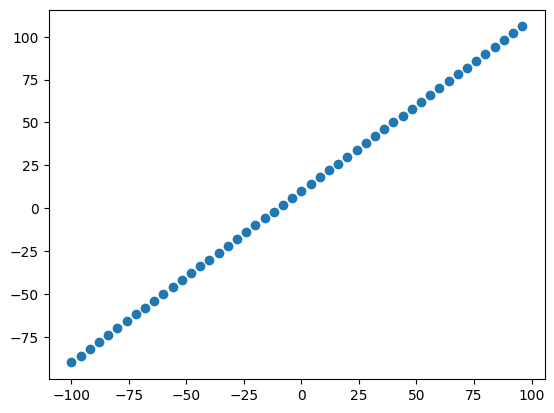

In [ ]:
# Plotting the original data
plt.scatter(X, y)

An important part of fitting a model is preforming **cross-validation**, in other words, splitting the data. The model will train on part of the data (around 70% - 80%), and validate on what remains of the data (typically 20% - 30%).

There are different ways of performing cross-validation, like the validation set method, or k-fold cross-validation, and the train-test split is the simplest of them.

**Train test split** is a model validation process that allows you to simulate how your model would perform with new data.



In [ ]:
# Creating a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), # splitting can't be done on tensors so we temporarily transform the data into numpy arrays
                                                    np.array(y),
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# 80% train, 20% test
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Turning the sets back into tensors
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

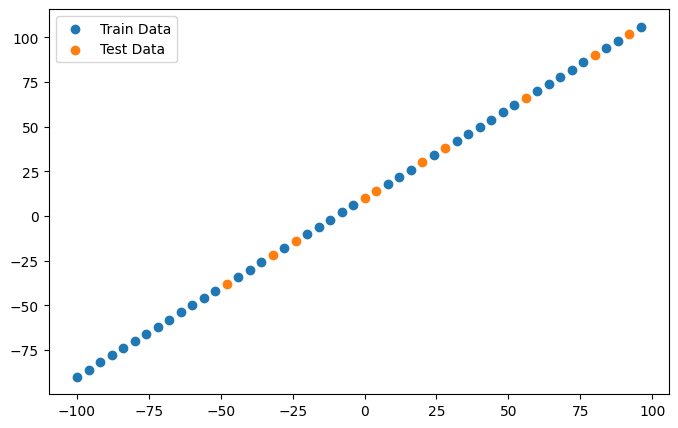

In [ ]:
# Visualizing the splits
plt.figure(figsize = (8,5))
plt.scatter(X_train, y_train, label = 'Train Data')
plt.scatter(X_test, y_test, label = 'Test Data')
plt.legend();

Now that we have our data ready and split, we will create a model that will be fitted on the train data, and evaluated on the test data.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1,
                          input_shape = [1]) # We need to define the input shape if we want to visualize the model before fitting it
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Getting a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - is the number of parameters in the model. We only have 2, since there's 1 weight connecting the input to the single neuron of the hidden layer, and 1 weight that connects said neuron to the output.

**Trainable params** - is the total number of parameters that can be trained in the network. Here both of the weights are trainable. This number can be different from the total params when using transfer learning.

In [ ]:
# Fitting the model on the train data
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 127.5219 - mae: 127.5219
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 80.8928 - mae: 80.8928
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.4959 - mae: 32.4959
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6618 - mae: 9.6618
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.7184 - mae: 10.7184
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 13.4494 - mae: 13.4494
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1080 - mae: 12.1080
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9292 - mae: 9.9292
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5638 - mae: 14.5638
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7971 - mae: 9.7971
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

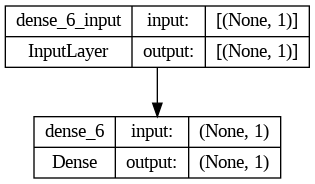

In [ ]:
# It is possible to plot the model
from tensorflow.keras.utils import plot_model

plot_model(model = model,
           show_shapes = True)

In [ ]:
# We can also name models and layers to easily distinguish them
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50,
                          input_shape = [1],
                          activation = 'relu',
                          name = 'Input_Layer'),
    tf.keras.layers.Dense(units = 1,
                          name = 'Output_Layer')
], name = 'Model1')

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 50)                100       
                                                                 
 Output_Layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

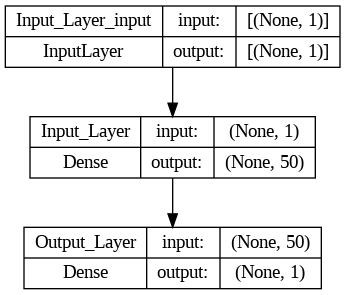

In [ ]:
plot_model(model = model,
           show_shapes = True)

In [ ]:
# Visualizing the predictions
# First we'll get the predictions first
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[-11.679518 ],
       [ 52.19743  ],
       [ 18.971266 ],
       [ 74.34822  ],
       [ -7.6283426],
       [ 85.4236   ],
       [  4.2040806],
       [  0.5123664],
       [ 26.354855 ],
       [ -5.6027555]], dtype=float32)

In [ ]:
# Now we'll define a function that will plot the predictions
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = y_pred):
  plt.figure(figsize = (8,6))
  # Plotting the train data
  plt.scatter(train_data, train_label, c='b', label = "Train Data")
  # Plotting the test data
  plt.scatter(test_data, test_label, c = 'g', label = 'Test Data')
  # Plotting the predictions against the test labels
  plt.scatter(test_label, predictions, c = 'r', label = 'Predictions')
  plt.legend();

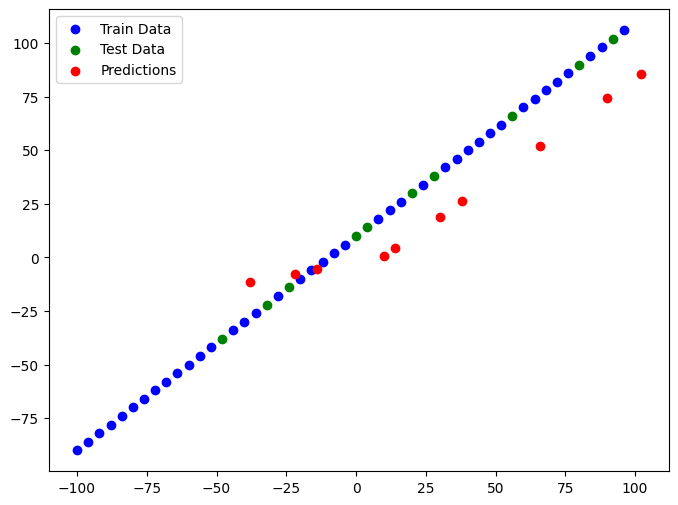

In [ ]:
plot_predictions()

##Evaluating the model with Evaluation Metrics

One of the most common ways to evaluate any model is by using evaluation metrics. Theses metrics quantify how wrong our model is, and help us decide whether we should improve our model or not.

Depending on the type of problem we're trying to solve (either regression or classification), there are different metrics that can be used.

Since we're working with a regression problem, here are some of the most common regreesion metrics:

*   **Mean Absolute Error (MAE)** - The most basic regreesion metric.
*   **Mean Squared Error (MSE)** - Punishes high error values.
* **Root Mean Squared Error (RMSE)** - The square root of MSE. It is measured in the same units as the variables.
* **Huber** - Calculate the Huber loss. A combination of MAE & MSE.
* **$R^2$ Score** - coefficient of determination. It quantifies the percentage of variance of the dependant variables that is explained by the independant  variables. It is a useful statistic for evaluating the overall effectiveness and explanatory power of a regression model.

In TensorFlow, these metrics can be accessed through `tensorflow.keras.losses`.





In [ ]:
# Evaluating the model on the test set quickly with the metric chosen during compilation (MAE)
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 176ms/step - loss: 13.7078 - mae: 13.7078


[13.707756042480469, 13.707756042480469]

In [ ]:
# Now let's use the regression metrics
# Calculating MAE
# We need to convert the preditions into a tensor from a numpy array
# We also need to squeeze the prediction tensor since it has the shape of (10,1) while y_test has the shape of (10,)
tf.keras.losses.MAE(y_test, tf.constant(y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=13.707756>

In [ ]:
# Calculating MSE
tf.keras.losses.mean_squared_error(y_test, tf.constant(y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=212.33098>

In [ ]:
# Calculating RMSE
import math
math.sqrt(tf.keras.losses.mean_squared_error(y_test, tf.constant(y_pred.squeeze())))

14.57158119057622

In [ ]:
# Putting MAE, MSE, RMSE into a function
def regression_metrics(y_true, y_pred):
  metrics = {}
  y_pred = tf.constant(y_pred.squeeze())
  mae = tf.get_static_value(tf.keras.losses.mean_absolute_error(y_true, y_pred))
  mse = tf.get_static_value(tf.keras.losses.mean_squared_error(y_true, y_pred))
  rmse = math.sqrt(tf.keras.losses.mean_squared_error(y_true, y_pred))

  metrics['MAE'] = mae
  metrics['MSE'] = mse
  metrics['RMSE'] = rmse

  return metrics

In [ ]:
results = regression_metrics(y_test, y_pred)
results

{'MAE': 13.707756, 'MSE': 212.33098, 'RMSE': 14.57158119057622}

#Modeling Experiments

Now that we evaluated our regression model, the next logical step is to improve the regression metrics. This can be done with the steps (among others) outlined in **Improveing the Model** section.

But improving a single model is not enough. A better paradigm is to run multiple experiments using the data provided, i.e. build multiple, slighlty different models, fit them, and get predictions using said models.

For example: using the X and y data above, we want to model multiple experiments with these models:

1. `model_1` - consisting of a single hidden layer, trained for 100 epochs.
2. `model_2` - consisting of two hidden layers, trained for 100 epochs.
3. `model_3` - consisting of two hidden layers, trained for 500 epochs
4. `model_4` - consisting of three hidden layers, trained for 100 epochs.

In [ ]:
# BUILDING model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae', 'mse'])

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 76.0047 - mae: 76.0047 - mse: 7765.6641
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 30.8264 - mae: 30.8264 - mse: 1395.5071
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 17.0841 - mae: 17.0841 - mse: 395.8116
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4744 - mae: 9.4744 - mse: 129.9445
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 11.3302 - mae: 11.3302 - mse: 186.1942
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8216 - mae: 9.8216 - mse: 131.4445
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 22.3940 - mae: 22.3940 - mse: 695.1554
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6734 - mae: 9.6734 - mse: 96.5105
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 15.8206 - mae: 15.8206 - mse: 339.1222
Epoch 10/10

1/1 [==============================] - 0s 114ms/step


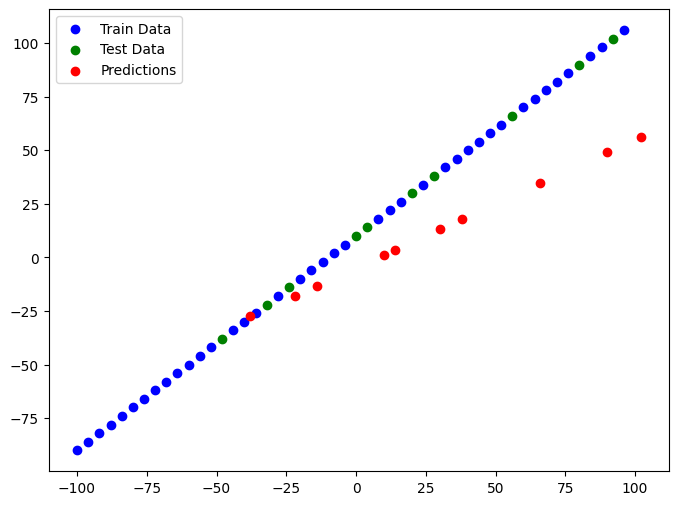

In [ ]:
# Making predictions with model_1 and plotting them
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [ ]:
# Getting evaluation metrics for model_1
model_1_results = regression_metrics(y_test, y_pred_1)
model_1_results

{'MAE': 18.946505, 'MSE': 574.72375, 'RMSE': 23.97339681569578}

In [ ]:
# Adding model_1 results to a dictionary the will contain all the results for the four experiments
experiments = {}
experiments['model_1'] = model_1_results
experiments

{'model_1': {'MAE': 18.946505, 'MSE': 574.72375, 'RMSE': 23.97339681569578}}

In [ ]:
# BUILDING model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50),
    tf.keras.layers.Dense(units = 1)
])

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae', 'mse'])

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 49.3569 - mae: 49.3569 - mse: 3001.0210
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 12.3175 - mae: 12.3175 - mse: 219.1624
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 29.3306 - mae: 29.3306 - mse: 1245.4781
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 26.5418 - mae: 26.5418 - mse: 926.0646
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 25.9929 - mae: 25.9929 - mse: 989.8639
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.3085 - mae: 10.3085 - mse: 121.1827
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 42.7813 - mae: 42.7813 - mse: 2375.7534
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 17.8042 - mae: 17.8042 - mse: 539.4213
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.7459 - mae: 40.7459 - mse: 2272.3550

1/1 [==============================] - 0s 111ms/step


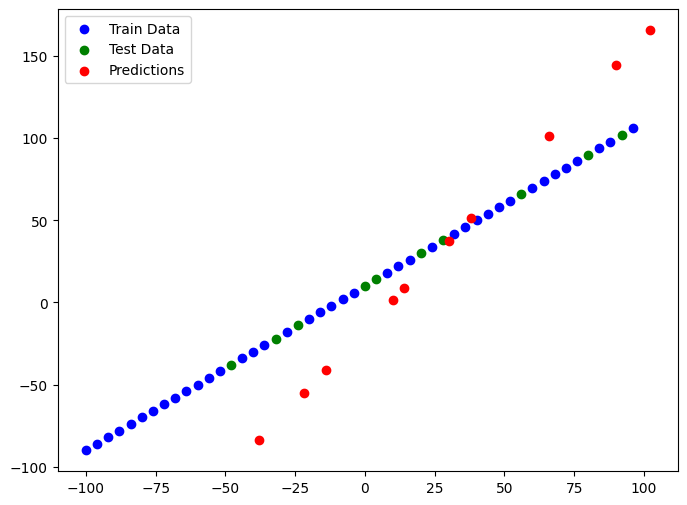

In [ ]:
# Making predictions with model_1 and plotting them
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [ ]:
# Getting evaluation metrics for model_2
model_2_results = regression_metrics(y_test, y_pred_2)
model_2_results

{'MAE': 29.45844, 'MSE': 1257.9905, 'RMSE': 35.468161476394926}

In [ ]:
# Adding model_2 results to a dictionary the will contain all the results for the four experiments
experiments['model_2'] = model_2_results
experiments

{'model_1': {'MAE': 18.946505, 'MSE': 574.72375, 'RMSE': 23.97339681569578},
 'model_2': {'MAE': 29.45844, 'MSE': 1257.9905, 'RMSE': 35.468161476394926}}

In [ ]:
# BUILDING model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50),
    tf.keras.layers.Dense(units = 1)
])

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae','mse'])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 51ms/step


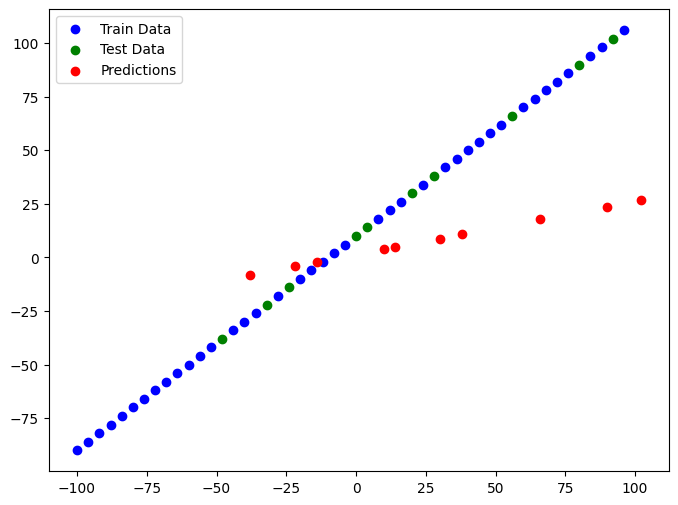

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [ ]:
model_3_results = regression_metrics(y_test, y_pred_3)
model_3_results

{'MAE': 31.321056, 'MSE': 1505.641, 'RMSE': 38.802590006479434}

In [ ]:
experiments['model_3'] = model_3_results
experiments

{'model_1': {'MAE': 18.946505, 'MSE': 574.72375, 'RMSE': 23.97339681569578},
 'model_2': {'MAE': 29.45844, 'MSE': 1257.9905, 'RMSE': 35.468161476394926},
 'model_3': {'MAE': 31.321056, 'MSE': 1505.641, 'RMSE': 38.802590006479434}}

In [ ]:
# BUILDING model_4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100),
    tf.keras.layers.Dense(units = 50),
    tf.keras.layers.Dense(units = 1)
])

model_4.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD())

model_4.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

1/1 [==============================] - 0s 68ms/step


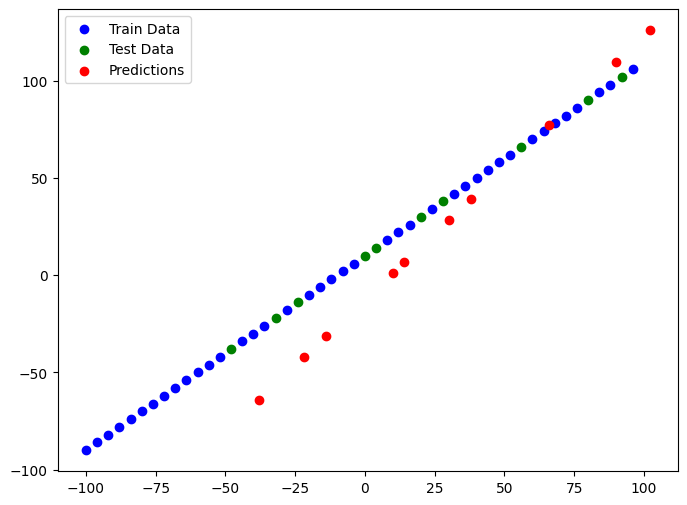

In [ ]:
y_pred_4 = model_4.predict(X_test)
plot_predictions(predictions = y_pred_4)

In [ ]:
model_4_results = regression_metrics(y_test, y_pred_4)
model_4_results

{'MAE': 13.735542, 'MSE': 260.389, 'RMSE': 16.13657360062412}

In [ ]:
experiments['model_4'] = model_4_results
experiments

{'model_1': {'MAE': 18.946505, 'MSE': 574.72375, 'RMSE': 23.97339681569578},
 'model_2': {'MAE': 29.45844, 'MSE': 1257.9905, 'RMSE': 35.468161476394926},
 'model_3': {'MAE': 31.321056, 'MSE': 1505.641, 'RMSE': 38.802590006479434},
 'model_4': {'MAE': 13.735542, 'MSE': 260.389, 'RMSE': 16.13657360062412}}

In [ ]:
# Showing results as a pandas dataframe
import pandas as pd
result_frame = pd.DataFrame(experiments).T
result_frame

,MAE,MSE,RMSE
model_1,18.946505,574.723755,23.973397
model_2,29.458441,1257.990479,35.468161
model_3,31.321056,1505.640991,38.802590
model_4,13.735542,260.389008,16.136574


In [ ]:
# The best model we got is model_4 as evident by MAE and MSE.
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Saving & Loading the Model

Now that we got a well-performing model, it is a good idea to save it so that we can use it outside google colab in other applications.

There are different formats in which we can save a TensorFlow model:

1.   **SavedModel** format - A SavedModel contains a complete TensorFlow program, including trained parameters (i.e, tf.Variables) and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying with TFLite, TensorFlow.js, TensorFlow Serving, or TensorFlow Hub.
2.   **HDF5** format - a basic legacy high-level save format using the HDF5 standard. A model is saved as a .h5 file.
3. **Keras** format - The new Keras v3 saving format, marked by the .keras extension, is a more simple, efficient format that implements name-based saving, ensuring what you load is exactly what you saved, from Python's perspective. This makes debugging much easier, and it is the recommended format for Keras.

The first two are older formats and are not recommended as per the documentation. Hence, the newer Keras format is preferred.



In [ ]:
# Saving model_4
model_4.save('best_regress_model.keras')

In [ ]:
# Loading model_4
model_4_loaded = tf.keras.models.load_model('best_regress_model.keras')
model_4_loaded.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Checking if the model still performs well after loading
y_pred = model_4_loaded.predict(X_test)

regression_metrics(y_test, y_pred)

1/1 [==============================] - 0s 23ms/step


{'MAE': 13.735542, 'MSE': 260.389, 'RMSE': 16.13657360062412}

#TensorFlow Regression on a Real-World Dataset

Now that we've went through all the steps required to build, train, evaluate a tensorflow model on some basic manually generated dataset, it is time to perform what we've learned using a real-world dataset.

More specifically, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available from Kaggle.

In this dataset, We're going to try predict the cost of medical insurance (`charges`) for individuals based on a number of different parameters such as `age`, `sex`, `bmi` (body mass index), `children`, `smoking_status` and `residential_region`.



In [75]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
# Checking the length of the dataset, we have 1338 entries and 7 columns
len(df)

1338

In [77]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since we have string data in the dataset, we must one-hot encode it before feeding it into a TensorFlow model.

In [78]:
df_encoded = pd.get_dummies(df)

df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [80]:
# Defining the features and the label
y = df_encoded['charges']
X = df_encoded.drop('charges', axis = 1)

In [83]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [84]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [85]:
# Creating the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
len(X_train), len(X_test)

(1070, 268)

In [ ]:
# Building the model